In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import skimage as sk

In [5]:
def sobel_edges(image_path):
    image = cv.imread(str(image_path))
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    blurred_image = cv.GaussianBlur(gray_image,(3,3),0)


    Gx = cv.Sobel(blurred_image,cv.CV_64F,1,0,ksize=3)
    Gy = cv.Sobel(blurred_image,cv.CV_64F,0,1,ksize=3)

    G = cv.convertScaleAbs(cv.magnitude(Gx, Gy))

    avg_g = np.mean(G)

    plt.figure(figsize=(15,10))

    plt.subplot(1,2,1)
    plt.imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB))
    plt.title('Original Image')
    
    plt.subplot(1,2,2)
    plt.imshow(G,cmap='gray')
    plt.title('Edge Detection')

    plt.show()
    print(avg_g)

# directory = "10-07_Pictures/"

# for filename in os.listdir(directory):
#     image_path = os.path.join(directory, filename)
#     sobel_edges(image_path)
# sobel_edges("10-07_Pictures/20241007-1A.dng",100)



In [6]:
from pathlib import Path


from pedestrian_detection import (
    preprocess_image,
    resize_image,
    detect_pedestrians,
    upscale_boxes,
    draw_boxes,
    get_image_dir_from_env,
)

import pedestrian_illuminance as pi

image_dir = get_image_dir_from_env()
all_data = []

image_dir_path = Path("10-07_Pictures/20241007-3B.dng")
destination = Path("./cropped_images")



str_path = image_dir_path.as_posix()
if not destination.exists():
    os.makedirs(destination)
original_image = pi.read_raw_image(str_path)
enhanced_image = preprocess_image(str_path)
resized_image, scale_factor = resize_image(enhanced_image)
results = detect_pedestrians(resized_image)
boxes = upscale_boxes(results, scale_factor)

luminances = []
rms_data = []
csv_data = []
image_name = image_dir_path.name.split(".")[0]

for idx, box in enumerate(boxes):
    print(box)
    cropped = pi.crop_image(original_image, *box[:4])
    image_name = image_dir_path.name.split(".")[0]
    result_image_path = destination.joinpath(image_name + str(idx) + "-cv.jpg").as_posix()
    cv.imwrite(
        result_image_path,
        cropped
    )
    # directory = "cropped_images"

    # for filename in os.listdir(directory):
    #     image_path = os.path.join(directory, filename)
    #     edges = detect_edges(image_path)

        # plt.imshow(edges)
    


0: 448x640 (no detections), 291.0ms
Speed: 3.3ms preprocess, 291.0ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


In [ ]:
directory = "cropped_images"

def custom_sort_key(filename):
    # Match the pattern YYYYMMDD-8B0-cv.jpg
    match = re.match(r"\d{8}-(\w+)-cv\.jpg", filename)
    if match:
        # Extract the relevant part (8B0 in this case)
        return (match.group(1), filename)  # First sort by the alphanumeric part
    return (filename, )  # Fallback for unexpected formats

file_list = os.listdir(directory)
sorted_files = sorted(file_list, key=custom_sort_key)


for filename in sorted_files:
    image_path = os.path.join(directory, filename)
    edges = sobel_edges(image_path)
    print(filename)
    # plt.imshow(edges)

In [ ]:
def canny_edges(image_path):
    image = cv.imread(str(image_path))
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    blurred_image = cv.GaussianBlur(gray_image,(3,3),0)

    G = cv.Canny(blurred_image,100,200)
    

    avg_g = np.mean(G)

    plt.figure(figsize=(15,10))

    plt.subplot(1,2,1)
    plt.imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB))
    plt.title('Original Image')
    
    plt.subplot(1,2,2)
    plt.imshow(G,cmap='gray')
    plt.title('Edge Detection')

    plt.show()
    print(avg_g)

directory = "cropped_images/"

for filename in os.listdir(directory):
    image_path = os.path.join(directory, filename)
    canny_edges(image_path)

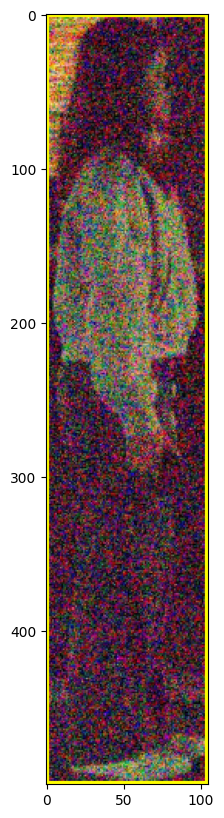

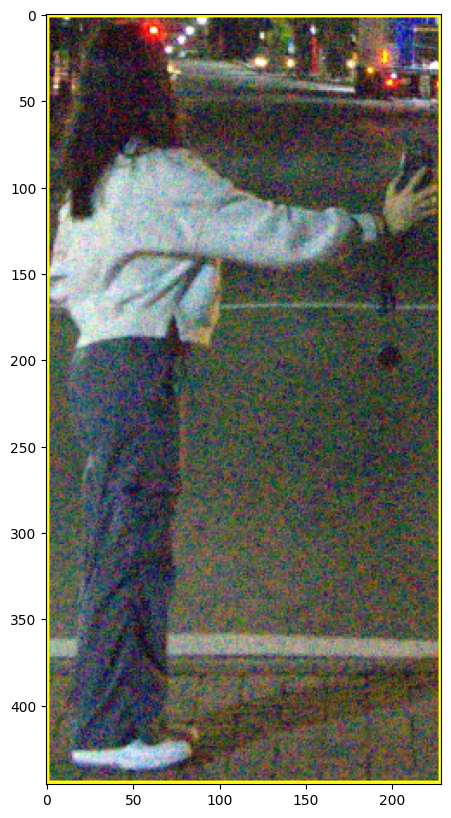

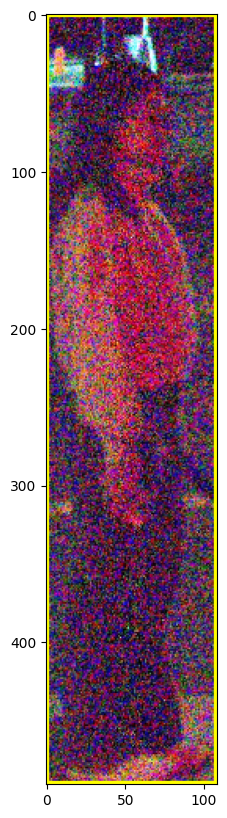

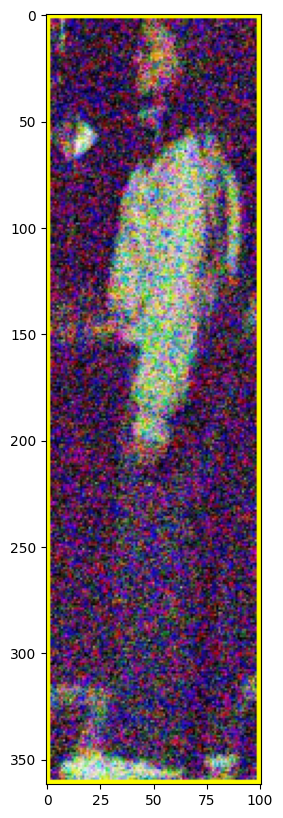

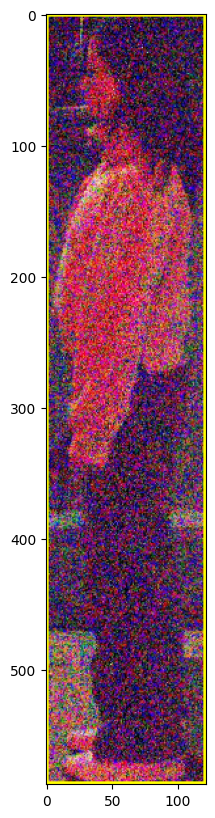

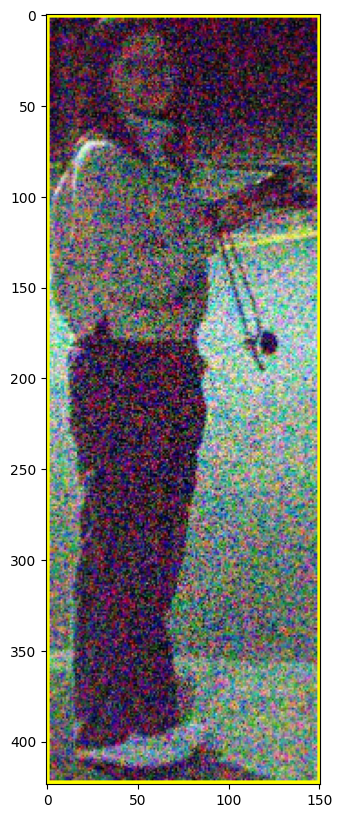

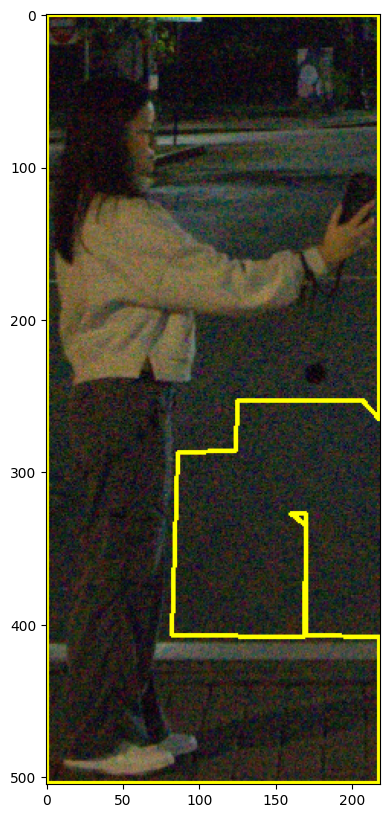

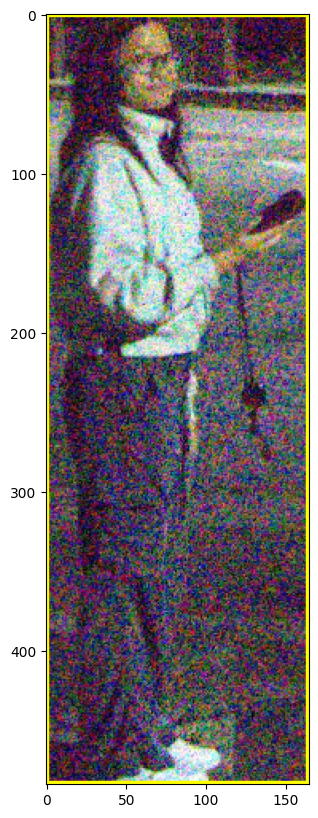

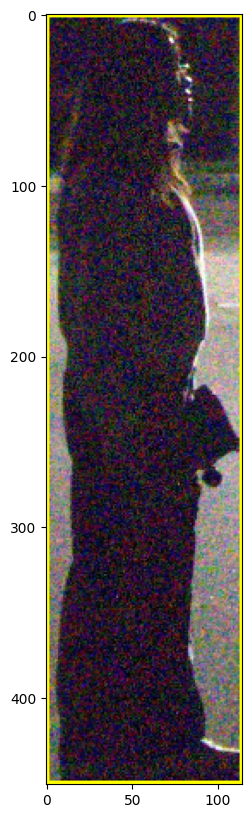

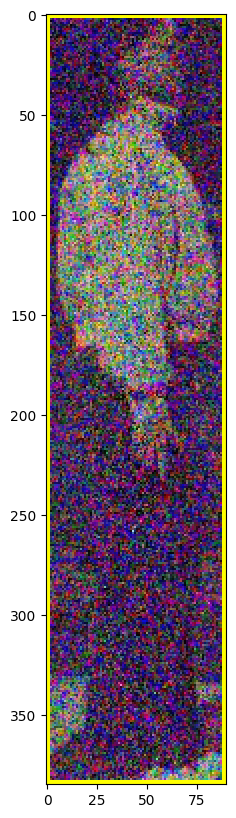

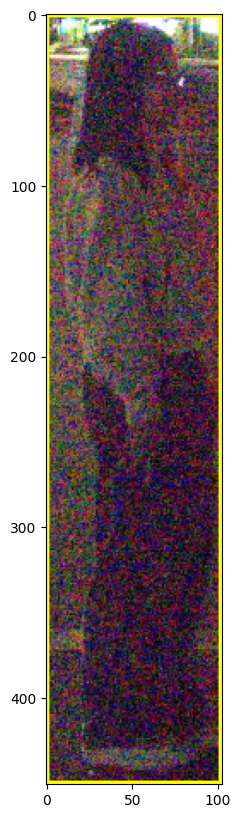

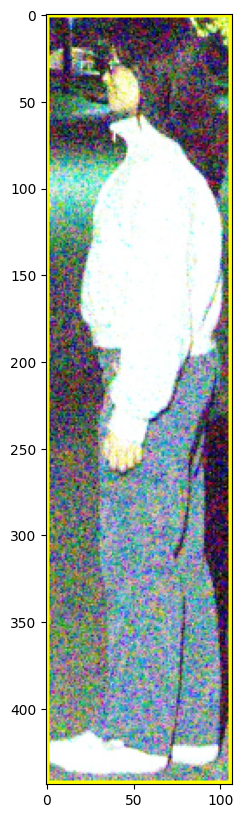

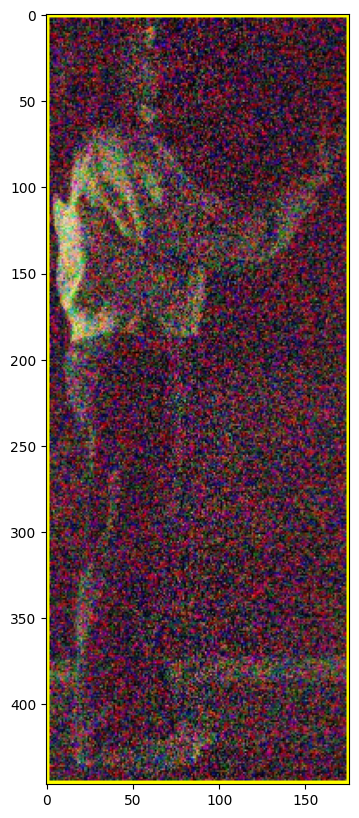

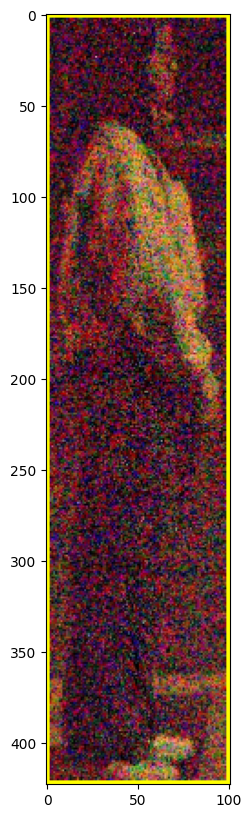

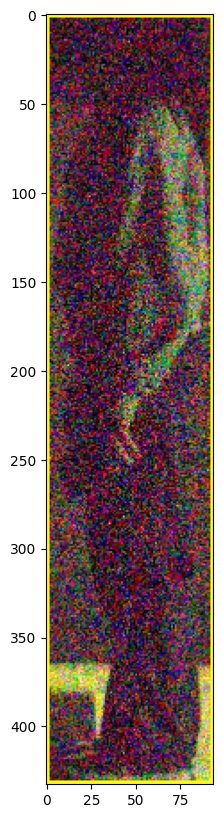

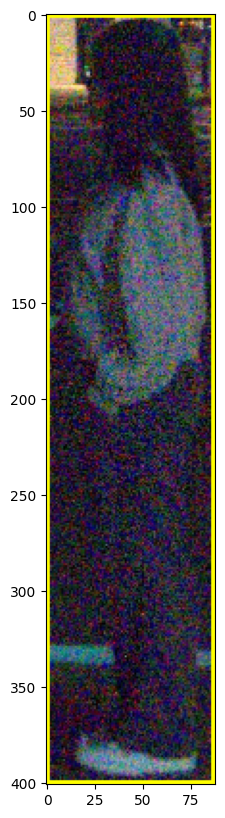

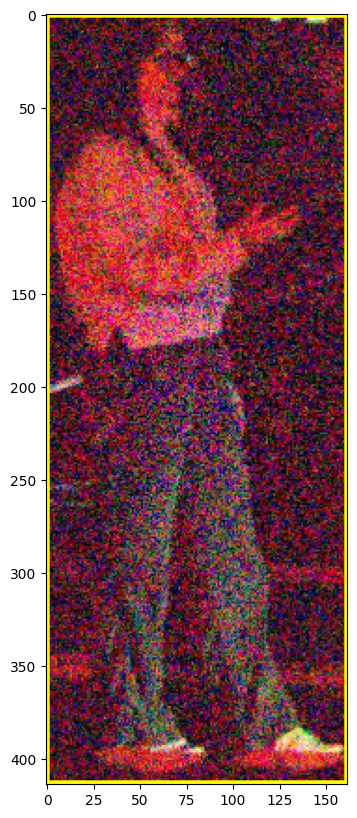

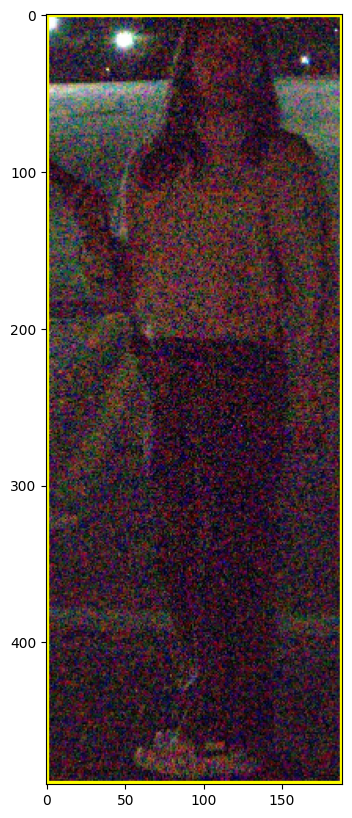

In [14]:
def canny_two(image_path):
    gray_image = cv.cvtColor(image_path, cv.COLOR_BGR2GRAY)
    image_blur = cv.GaussianBlur(gray_image,(11,11),7)
    image_canny = cv.Canny(image_blur,0,10)

    kernel = np.ones((19,19))
    image_dilate = cv.dilate(image_canny, kernel, iterations=4)
    image_erode = cv.erode(image_dilate,kernel,iterations=4)
    return image_erode

def draw_contours(image_path):
    contours, hierarchies=cv.findContours(canny_two(image_path),cv.RETR_EXTERNAL,cv.CHAIN_APPROX_NONE)
    cnt=max(contours,key=cv.contourArea)
    peri=cv.arcLength(cnt,True)
    approx=cv.approxPolyDP(cnt,0.004*peri,True)
    image = cv.drawContours(image_path,[approx],-1,(255,255,0),2)
    return image

directory = "cropped_images/"

for filename in os.listdir(directory):
    image_path = os.path.join(directory, filename)
    img=cv.imread(image_path)
    h,w,c=img.shape
    img=cv.resize(img,(w//2,h//2))
    plt.figure(figsize=(15,10))

    plt.imshow(draw_contours(img),cmap='gray')
    # cv.imshow("Image",img)
    plt.show()

    # key = cv.waitKey(0)
    # if key == 27:  
    #     break

# cv.destroyAllWindows()